# Text Mining of Stack Overflow

For me, weekends are not only days where I spend my time with my family and friends, but also where I think about what projects I am going to do in the next few days. I try to select my projects for the subjects are involved and how interesting are for me. This project was thought when I tried to solve a specific issue I had when I reviewed my code made in Python. That's why I checked the best website for programmers (of any language), which is Stack Overflow, to solve my problem. Now, I'll use it not to review my code, but to mine the different questions and answers and make an statistical analysis to the information I can obtain from them.

In this time, I'll make use of Beautiful Soup to help me mining the website easily.

In [3]:
import requests
from bs4 import BeautifulSoup

from datetime import datetime
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def getAnswersbyLanguage(language):
    questions=list()
    count=0
    for pag in range(1,2):
        rawText=getQuestionsbyPage('https://stackoverflow.com/questions/tagged/'+language,pag)
        
        
        for raw in rawText:
            
            q=raw.select_one('.question-hyperlink').getText()
            hyperlink=raw.select_one('.question-hyperlink').get('href')
            
            timeResponses=getAnswers(hyperlink)
            
            
            if(raw.select_one('.relativetime')):
                timeQuestion=raw.select_one('.relativetime').attrs['title']
                views=raw.select_one('.views').attrs['title']
                pos=views.find(' ')
                numViews=convertStringToInt(views[:pos])
                tup = (q,timeQuestion,numViews,timeResponses)
                questions.append(tup)
            else:
                next
            
            count+=1
    return questions,count

def getQuestionsbyLanguage(language):
    questions=list()
    count=0
    for pag in range(1,101):
        rawQuestions=getQuestionsbyPage('https://stackoverflow.com/questions/tagged/'+language,pag)
        
        for raw in rawQuestions:
            
            q=raw.select_one('.question-hyperlink').getText()
               
            if(raw.select_one('.relativetime')):
                timeQuestion=raw.select_one('.relativetime').attrs['title']
                views=raw.select_one('.views').attrs['title']
                pos=views.find(' ')
                numViews=convertStringToInt(views[:pos])
                tup = (q,timeQuestion,numViews)
                questions.append(tup)
            else:
                next
            
            count+=1
    return questions,count

def getQuestionsbyPage(http, page):
    res= requests.get(http+'?sort=votes&page='+str(page)+'&pagesize=50')
    soup=BeautifulSoup(res.text,'html.parser')
    rawQuestions=soup.select('.question-summary')
    return rawQuestions

def convertStringToInt(string):
    newString=''
    count=string.count(',')
    for i in range(count):
        pos=string.find(',')
        newString+=string[:pos]
        string=string[pos+1:]
    newString+=string
    return int(newString)

def getAnswers(hyperlink):
    res= requests.get('https://stackoverflow.com'+hyperlink)
    soup=BeautifulSoup(res.text,'html.parser')
    rawAnswer=soup.find(id='answers')
    arrayTime=list()
    if(rawAnswer):
        answers=rawAnswer.select('.relativetime')
        answers_cle=rawAnswer.select('.relativetime-clean')
        if(answers):
            for oneAnswer in answers:
                date=oneAnswer.attrs['title']
                #pos=date.find(' ')
                #date=date[:pos]
                arrayTime.append(date)
        if(answers_cle):
            for oneAnswer in answers_cle:
                date=oneAnswer.attrs['title']
                #pos=date.find(' ')
                #date=date[:pos]
                arrayTime.append(date)
    return arrayTime

In [5]:
def countPosts(questions):
    numPosts=np.zeros(5)
    count=0
    for que,dat,views in questions: #from the tuple, grab only the year ( it means the second element)
        
        pos=dat.find('-')
        year=dat[:pos]
        if(year=='2019'):
            numPosts[4]+=views ## sum the number of views
            count+=1
        if(year=='2018'):
            numPosts[3]+=(views*2/3)
            numPosts[4]+=(views*1/3)
            count+=1
        elif(year=='2017'):
            numPosts[2]+=(views*2/5)
            numPosts[3]+=(views*2/5)
            numPosts[4]+=(views*1/5)
            count+=1
        elif(year=='2016'):
            numPosts[1]+=(views*2/7)
            numPosts[2]+=(views*2/7)
            numPosts[3]+=(views*2/7)
            numPosts[4]+=(views*1/7)
            count+=1
        elif(year=='2015'):
            numPosts[0]+=(views*2/9)
            numPosts[1]+=(views*2/9)
            numPosts[2]+=(views*2/9)
            numPosts[3]+=(views*2/9)
            numPosts[4]+=(views*1/9)
            count+=1
        

    return numPosts,count

In [6]:

def countWeekdays_Questions(questions):
    numPosts=np.zeros(7)
    count=0
    for que,dat,views in questions: #from the tuple, grab only the year ( it means the second element)
        pos=dat.find(' ')
        d=datetime.strptime(dat[:pos],'%Y-%m-%d')
        d=d.strftime("%A")
        if(d=='Monday'):
            numPosts[6]+=1 
            count+=1
        if(d=='Tuesday'):
            numPosts[5]+=1
            count+=1
        if(d=='Wednesday'):
            numPosts[4]+=1
            count+=1
        if(d=='Thursday'):
            numPosts[3]+=1
            count+=1
        if(d=='Friday'):
            numPosts[2]+=1
            count+=1
        if(d=='Saturday'):
            numPosts[1]+=1
            count+=1
        if(d=='Sunday'):
            numPosts[0]+=1
            count+=1

    return numPosts,count

In [7]:
def countWeekdays_Answers(questions):
    
    numPosts=np.zeros(7)
    count=0
    for que,dat,views,datResp in questions: #from the tuple, grab only the year ( it means the second element)
        for dRes in datResp:
            pos=dRes.find(' ')
            d=datetime.strptime(dRes[:pos],'%Y-%m-%d')
            d=d.strftime("%A")
            if(d=='Monday'):
                numPosts[6]+=1 
                count+=1
            if(d=='Tuesday'):
                numPosts[5]+=1
                count+=1
            if(d=='Wednesday'):
                numPosts[4]+=1
                count+=1
            if(d=='Thursday'):
                numPosts[3]+=1
                count+=1
            if(d=='Friday'):
                numPosts[2]+=1
                count+=1
            if(d=='Saturday'):
                numPosts[1]+=1
                count+=1
            if(d=='Sunday'):
                numPosts[0]+=1
                count+=1

    return numPosts,count

In [8]:
def countTime(questions):
    
    numPosts=np.zeros(7)
    count=0
    for que,dat,views,datResp in questions: #from the tuple, grab only the year ( it means the second element)
        #print('-----------')
        for onedatRes in datResp:
            pos_space=onedatRes.find(' ')
            pos_point=onedatRes.find(':')
            d=int(onedatRes[pos_space:pos_point])
            #print(d)
            if(d<=4): # Early Morning
                numPosts[0]+=1 
                count+=1
            elif(d<=6): # Dawn
                numPosts[1]+=1
                count+=1
            elif(d<=9): # Morning
                numPosts[2]+=1
                count+=1
            elif(d<=12): # Mid Morning
                numPosts[3]+=1
                count+=1
            elif(d<=16): #Afternoon
                numPosts[4]+=1
                count+=1
            elif(d<=20): #Evening
                numPosts[5]+=1
                count+=1
            elif(d<=24): #Night
                numPosts[6]+=1
                count+=1
        

    return numPosts,count

After doing all the methods needed to obtain the information of the programming language, it is time to pick what will be the languages that I'll analyze. According to the most recent survey made by Stack Overflow (https://insights.stackoverflow.com/survey/2018#technology), most popular programming language is JavaScript, and in the same ranking I can find multiples programming languages. I'll pick 5 of the languages that I know: Java, Python, Php, R, Scala.

## Java

In [9]:
qJava,count=getQuestionsbyLanguage('java')
listNumbersJava_wd_q=countWeekdays_Questions(qJava)
listNumbersJava_count=countPosts(qJava)

In [19]:

#time.sleep(70)

ansJava,count=getAnswersbyLanguage('java')
listNumbersJava_time=countTime(ansJava)
listNumbersJava_wd_ans=countWeekdays_Answers(ansJava)

## JavaScript

In [20]:
qJavaScr,count=getQuestionsbyLanguage('javascript')
listNumbersJavaScr_wd_q=countWeekdays_Questions(qJavaScr)
listNumbersJavaScr_count=countPosts(qJavaScr)

In [21]:
time.sleep(70)
ansJavaScr,count=getAnswersbyLanguage('javascript')
listNumbersJavaScr_time=countTime(ansJavaScr)
listNumbersJavaScr_wd_ans=countWeekdays_Answers(ansJavaScr)

## Python

In [22]:
qPython,count=getQuestionsbyLanguage('python')
listNumbersPython_wd_q=countWeekdays_Questions(qPython)
listNumbersPython_count=countPosts(qPython)

In [23]:
time.sleep(70)
ansPython,count=getAnswersbyLanguage('python')
listNumbersPython_time=countTime(ansPython)
listNumbersPython_wd_ans=countWeekdays_Answers(ansPython)

## PHP

In [24]:
qPhp,count=getQuestionsbyLanguage('php')
listNumbersPhp_wd_q=countWeekdays_Questions(qPhp)
listNumbersPhp_count=countPosts(qPhp)

In [25]:
time.sleep(70)
ansPhp,count=getAnswersbyLanguage('php')
listNumbersPhp_time=countTime(ansPhp)
listNumbersPhp_wd_ans=countWeekdays_Answers(ansPhp)

## R

In [26]:
qR,count=getQuestionsbyLanguage('r')
listNumbersR_wd_q=countWeekdays_Questions(qR)
listNumbersR_count=countPosts(qR)

In [27]:
time.sleep(70)
ansR,count=getAnswersbyLanguage('r')
listNumbersR_time=countTime(ansR)
listNumbersR_wd_ans=countWeekdays_Answers(ansR)

## Scala

In [28]:
qScala,count=getQuestionsbyLanguage('scala')
listNumbersScala_wd_q=countWeekdays_Questions(qScala)
listNumbersScala_count=countPosts(qScala)

In [29]:
time.sleep(70)
ansScala,count=getAnswersbyLanguage('scala')
listNumbersScala_time=countTime(ansScala)
listNumbersScala_wd_ans=countWeekdays_Answers(ansScala)

I have to add delay times to my code because I am working with requests methods, and sometimes the website doesn't allow me to get access to its data many times to avoid spam. Now, it is feasible to save this information to not calculate again (and takes some time to do it), so I'll use pickle and save them in my computer.

In [31]:

scala_feat = [listNumbersScala_wd_q,listNumbersScala_count,listNumbersScala_time,listNumbersScala_wd_ans]
r_feat = [listNumbersR_wd_q,listNumbersR_count,listNumbersR_time,listNumbersR_wd_ans]
php_feat = [listNumbersPhp_wd_q,listNumbersPhp_count,listNumbersPhp_time,listNumbersPhp_wd_ans]
python_feat = [listNumbersPython_wd_q,listNumbersPython_count,listNumbersPython_time,listNumbersPython_wd_ans]
javaScr_feat = [listNumbersJavaScr_wd_q,listNumbersJavaScr_count,listNumbersJavaScr_time,listNumbersJavaScr_wd_ans]
java_feat = [listNumbersJava_wd_q,listNumbersJava_count,listNumbersJava_time,listNumbersJava_wd_ans]

feat=[scala_feat,r_feat,php_feat,python_feat,javaScr_feat,java_feat]

#Using pickle to save the features 
#filehandler = open('features', 'wb') 
#pickle.dump(feat, filehandler)

In [32]:
#Pickle to read the features
#filehandler = open('features', 'rb') 
#feat = pickle.load(filehandler)


In [33]:
scala_feat=feat[0]
r_feat=feat[1]
php_feat=feat[2]
python_feat=feat[3]
javaScr_feat=feat[4]
java_feat=feat[5]

listNumbersScala_wd_q=scala_feat[0]
listNumbersScala_count=scala_feat[1]
listNumbersScala_time=scala_feat[2]
listNumbersScala_wd_ans=scala_feat[3]

listNumbersR_wd_q=r_feat[0]
listNumbersR_count=r_feat[1]
listNumbersR_time=r_feat[2]
listNumbersR_wd_ans=r_feat[3]

listNumbersPhp_wd_q=php_feat[0]
listNumbersPhp_count=php_feat[1]
listNumbersPhp_time=php_feat[2]
listNumbersPhp_wd_ans=php_feat[3]

listNumbersPython_wd_q=python_feat[0]
listNumbersPython_count=python_feat[1]
listNumbersPython_time=python_feat[2]
listNumbersPython_wd_ans=python_feat[3]

listNumbersJavaScr_wd_q=javaScr_feat[0]
listNumbersJavaScr_count=javaScr_feat[1]
listNumbersJavaScr_time=javaScr_feat[2]
listNumbersJavaScr_wd_ans=javaScr_feat[3]

listNumbersJava_wd_q=java_feat[0]
listNumbersJava_count=java_feat[1]
listNumbersJava_time=java_feat[2]
listNumbersJava_wd_ans=java_feat[3]

In [45]:
def percentLanguages(listNumbersScala_count,listNumbersR_count,listNumbersPhp_count,listNumbersPython_count,
                    listNumbersJavaScr_count,listNumbersJava_count):
    listLanguages=['javascript','java','python','php','r','scala']
    percentViewLang=list()
    for i in range(5):
        totalListNumbers=listNumbersScala_count[0][i]+listNumbersR_count[0][i]+listNumbersPhp_count[0][i]+\
                listNumbersPython_count[0][i]+listNumbersJavaScr_count[0][i]+listNumbersJava_count[0][i]

        percentViewLang.append((listNumbersScala_count[0][i]/totalListNumbers,listNumbersR_count[0][i]/totalListNumbers, \
                                listNumbersPhp_count[0][i]/totalListNumbers,listNumbersPython_count[0][i]/totalListNumbers, \
                                listNumbersJava_count[0][i]/totalListNumbers,listNumbersJavaScr_count[0][i]/totalListNumbers))

    
    
    return percentViewLang,listLanguages

percentView,listLang=percentLanguages(listNumbersJavaScr_count,listNumbersPython_count,listNumbersPhp_count,
                    listNumbersJava_count,listNumbersR_count,listNumbersScala_count)

Finally, it is time to see in charts all the numbers and information calculated previously. I'll use matplotlib because it generates an easy framework to change the different parameters of the graphics. First, we will see the last ranking (2019) given by the Stack Overflow's survey.

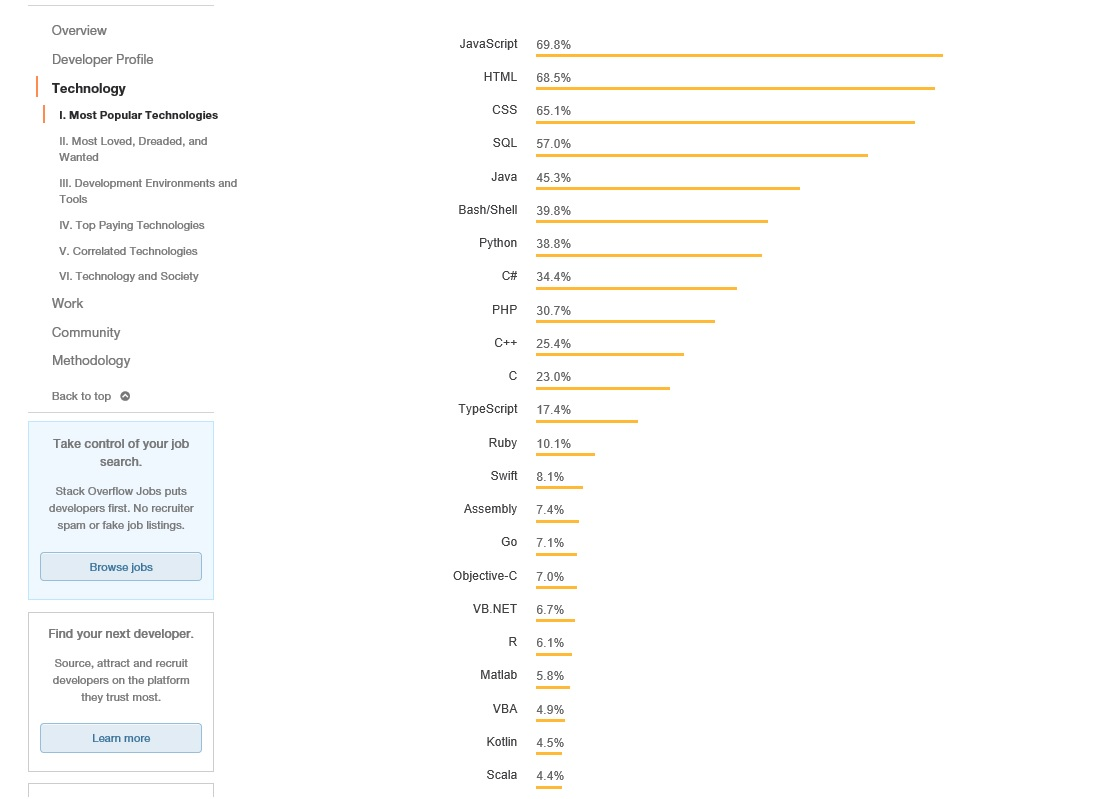

In [70]:
from IPython.display import Image
Image("ranking.jpg")

Next, we'll compare the information given by this ranking and the data was obtained using text mining.

In [36]:
years=[2015,2016,2017,2018,2019]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size


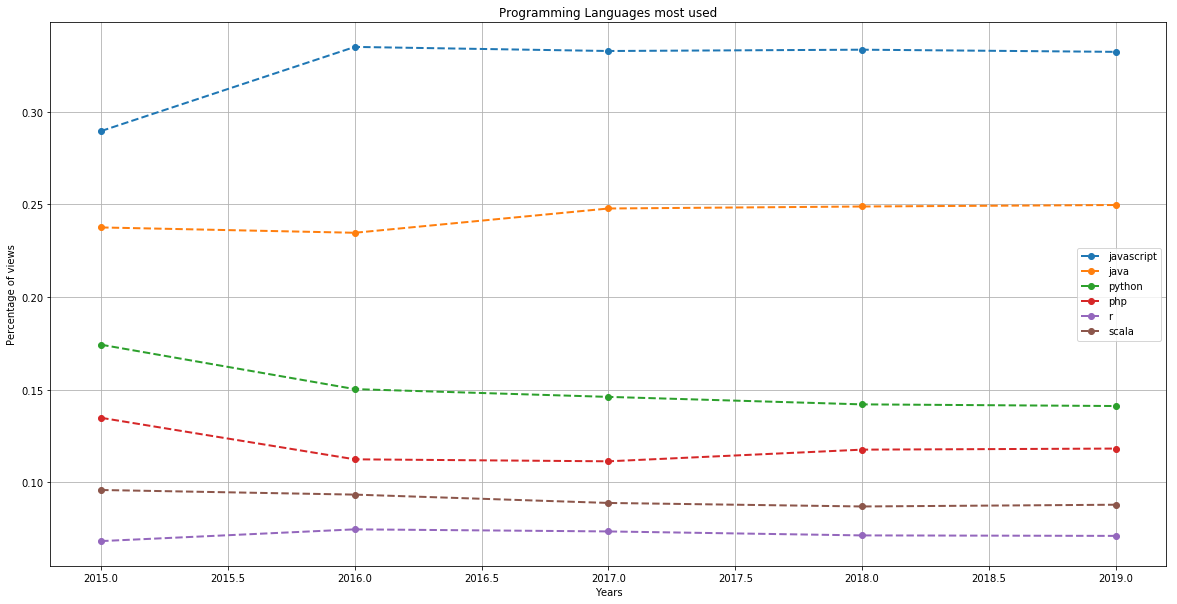

In [46]:
totalV=list(map(list, zip(*percentView)))

for i in range(6): #amount of programming languages used
    plt.plot(years,totalV[i],linewidth = 2,marker='o', linestyle='dashed')

plt.title('Programming Languages most used')
plt.xlabel('Years')
plt.ylabel('Percentage of views')
plt.grid()
plt.legend(listLang)
plt.show()

The line chart above shows some trends are consistent through the years. Even 2019 is showed because this project was finished in June 9th (almost in the half of the year). Below, we will make a plot to compare with a bar chart the use of the languages in 2018.

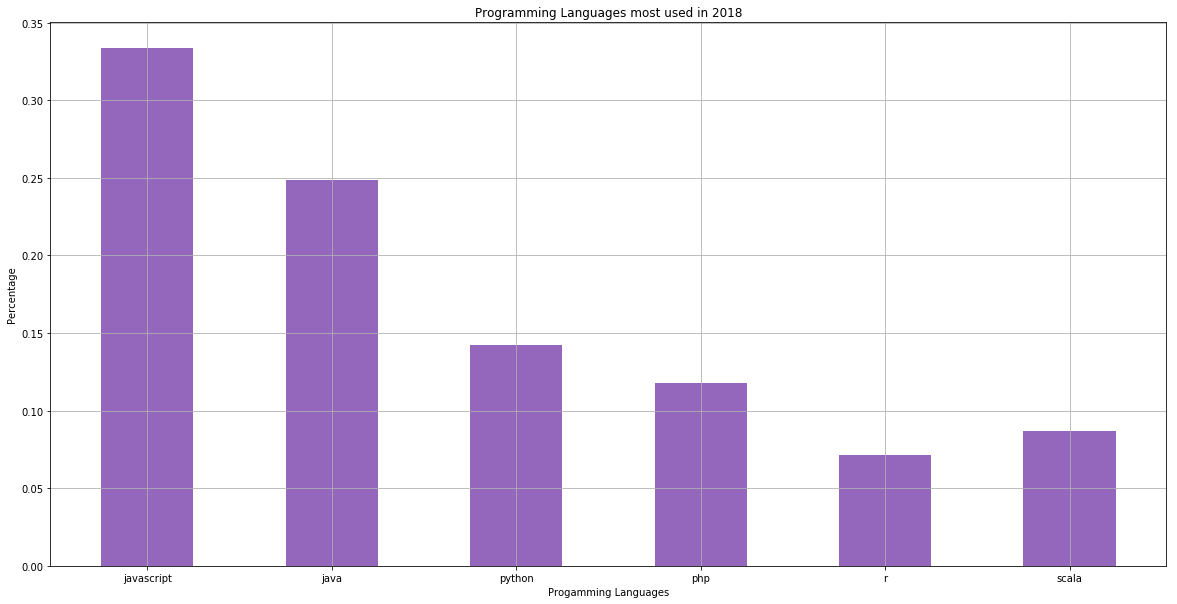

In [60]:
plt.title('Programming Languages most used in 2018')
plt.xlabel('Progamming Languages')
plt.ylabel('Percentage')
plt.bar(listLang,percentView[3],color='C4',width=.5)
plt.grid(True)
plt.show()

## Understanding when is the best moment of the week and day to use any programming language

Because I like to spend my time with my friends on weekends, I try not to do any work in these days because I like to balance my own personal life. That's why I begin this analysis to understand what day of the week and in what time people trends to work with programming languages.

First, This analysis shows the weekday when is most used the programming languages. The bar chart below will compare the data of the questions and answers are made in these days.

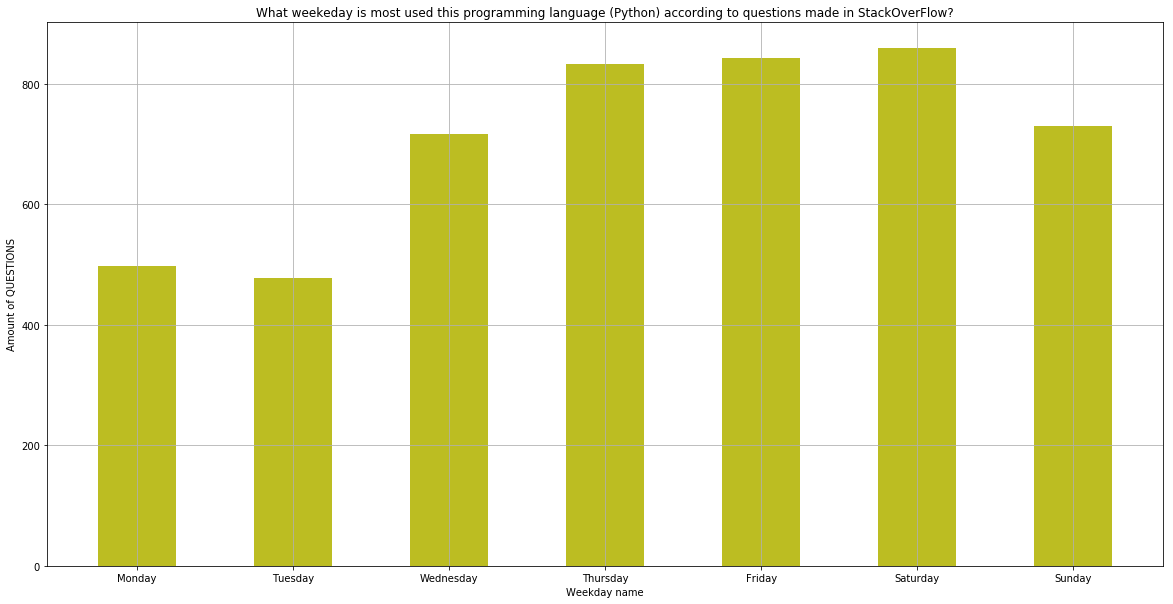

In [75]:
dates=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('What weekeday is most used this programming language (Python) according to questions made in StackOverFlow?')
plt.xlabel('Weekday name')
plt.ylabel('Amount of QUESTIONS')
plt.bar(dates,listNumbersPython_wd_q[0],color='C8',width=.5)
plt.grid(True)
plt.show()

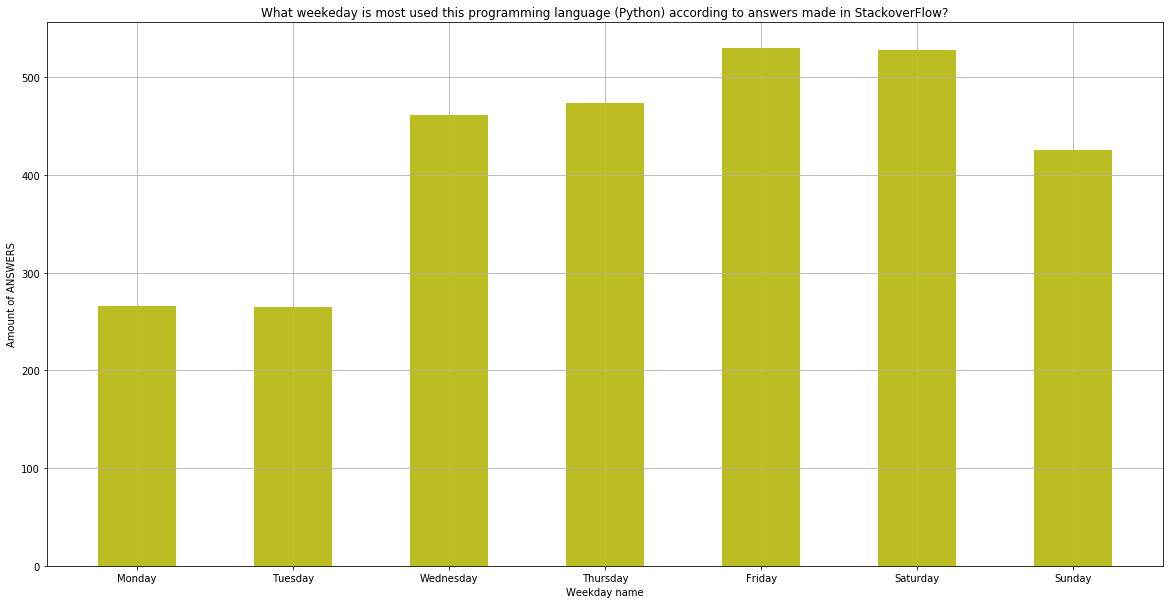

In [74]:
dates=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('What weekeday is most used this programming language (Python) according to answers made in StackoverFlow?')
plt.xlabel('Weekday name')
plt.ylabel('Amount of ANSWERS')
plt.bar(dates,listNumbersPython_wd_ans[0],color='C8',width=.5)
plt.grid(True)


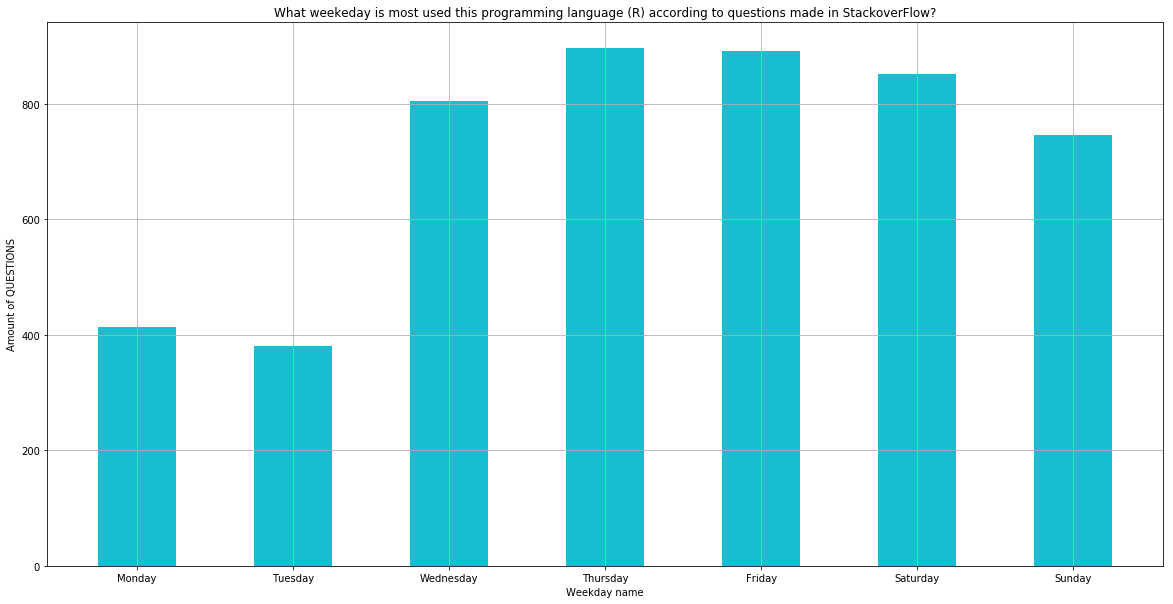

In [76]:
dates=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('What weekeday is most used this programming language (R) according to questions made in StackoverFlow?')
plt.xlabel('Weekday name')
plt.ylabel('Amount of QUESTIONS')
plt.bar(dates,listNumbersR_wd_q[0],color='C9',width=.5)
plt.grid(True)

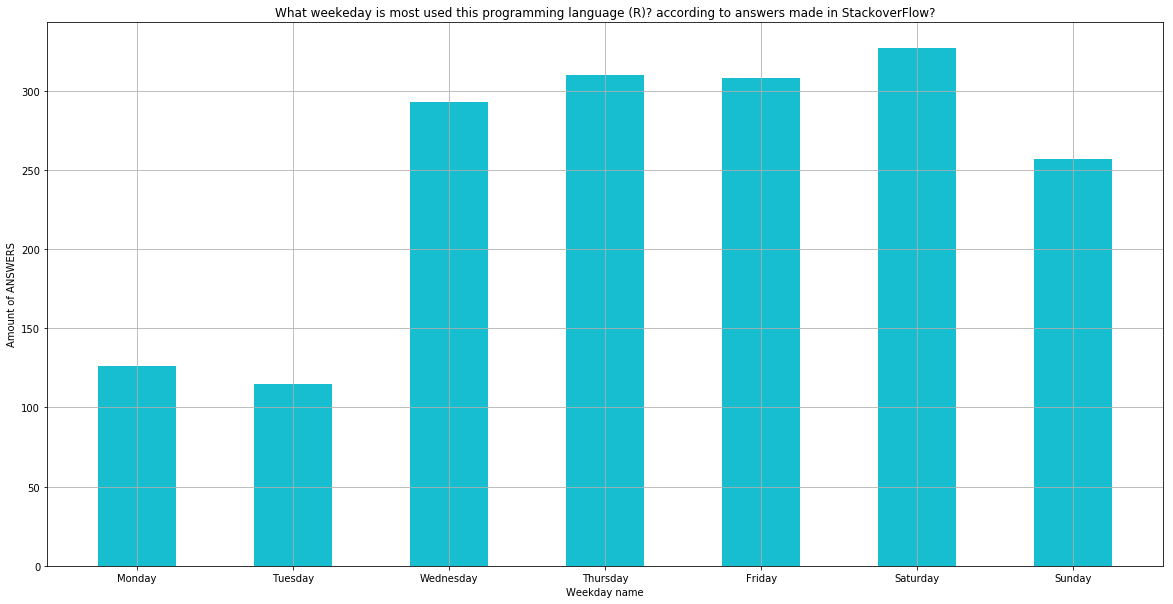

In [77]:
dates=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('What weekeday is most used this programming language (R)? according to answers made in StackoverFlow?')
plt.xlabel('Weekday name')
plt.ylabel('Amount of ANSWERS')
plt.bar(dates,listNumbersR_wd_ans[0],color='C9',width=.5)
plt.grid(True)

In [65]:
print('ACCORDING THE NUMBER OF QUESTIONS MADE FOR EACH PROGRAMMING LANGUAGE')
print('           ','Monday |','Tuesday |','Wednesday |','Thursday |','Friday |','Saturday |','Sunday')
print('JavaScript:', end="  ")
for i in range(7): print (listNumbersJavaScr_wd_q[0][i], end="      ")
print()
print('Java:      ',end="  ")
for i in range(7): print (listNumbersJava_wd_q[0][i], end="      ")
print()
print('Python:    ',end="  ")
for i in range(7): print (listNumbersPython_wd_q[0][i], end="      ")
print()
print('Php:       ',end="  ")
for i in range(7): print (listNumbersPhp_wd_q[0][i], end="      ")
print()
print('R:         ',end="  ")
for i in range(7): print (listNumbersR_wd_q[0][i], end="      ")
print()
print('Scala:     ',end="  ")
for i in range(7): print (listNumbersScala_wd_q[0][i], end="      ")
print()

ACCORDING THE NUMBER OF QUESTIONS MADE FOR EACH PROGRAMMING LANGUAGE
            Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday
JavaScript:  410.0      427.0      739.0      903.0      865.0      851.0      745.0      
Java:        421.0      380.0      752.0      867.0      850.0      885.0      772.0      
Python:      498.0      477.0      716.0      832.0      843.0      859.0      729.0      
Php:         464.0      464.0      774.0      825.0      849.0      828.0      746.0      
R:           413.0      380.0      804.0      896.0      891.0      852.0      746.0      
Scala:       546.0      513.0      764.0      812.0      845.0      741.0      744.0      


In [95]:
import csv

workbook = xlsxwriter.Workbook('questions.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write(0, 1,'Monday')
worksheet.write(0, 2,'Tuesday')
worksheet.write(0, 3,'Wednesday')
worksheet.write(0, 4,'Thursday')
worksheet.write(0, 5,'Friday')
worksheet.write(0, 6,'Saturday')
worksheet.write(0, 7,'Sunday')

row = 1

worksheet.write(row, 0,'JavaScript')
for i in range(7):
    worksheet.write(row, i+1,listNumbersJavaScr_wd_q[0][i])
row+=1

worksheet.write(row, 0,'Java')
for i in range(7):
    worksheet.write(row, i+1,listNumbersJava_wd_q[0][i])
row+=1

worksheet.write(row, 0,'Python')
for i in range(7):
    worksheet.write(row, i+1,listNumbersPython_wd_q[0][i])
row+=1

worksheet.write(row, 0,'Php')
for i in range(7):
    worksheet.write(row, i+1,listNumbersPhp_wd_q[0][i])
row+=1

worksheet.write(row, 0,'R')
for i in range(7):
    worksheet.write(row, i+1,listNumbersR_wd_q[0][i])
row+=1

worksheet.write(row, 0,'Scala')
for i in range(7):
    worksheet.write(row, i+1,listNumbersScala_wd_q[0][i])
row+=1

workbook.close()

In [66]:
print('ACCORDING THE NUMBER OF ANSWERS MADE FOR EACH PROGRAMMING LANGUAGE')
print('           ','Monday |','Tuesday |','Wednesday |','Thursday |','Friday |','Saturday |','Sunday')
print('JavaScript:', end="  ")
for i in range(7): print (listNumbersJavaScr_wd_ans[0][i], end="      ")
print()
print('Java:      ',end="  ")
for i in range(7): print (listNumbersJava_wd_ans[0][i], end="      ")
print()
print('Python:    ',end="  ")
for i in range(7): print (listNumbersPython_wd_ans[0][i], end="      ")
print()
print('Php:       ',end="  ")
for i in range(7): print (listNumbersPhp_wd_ans[0][i], end="      ")
print()
print('R:         ',end="  ")
for i in range(7): print (listNumbersR_wd_ans[0][i], end="      ")
print()
print('Scala:     ',end="  ")
for i in range(7): print (listNumbersScala_wd_ans[0][i], end="      ")
print()

ACCORDING THE NUMBER OF ANSWERS MADE FOR EACH PROGRAMMING LANGUAGE
            Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday
JavaScript:  344.0      337.0      598.0      621.0      674.0      662.0      511.0      
Java:        252.0      304.0      546.0      522.0      626.0      584.0      464.0      
Python:      266.0      265.0      461.0      474.0      530.0      528.0      426.0      
Php:         240.0      216.0      421.0      384.0      387.0      486.0      419.0      
R:           126.0      115.0      293.0      310.0      308.0      327.0      257.0      
Scala:       135.0      113.0      161.0      169.0      168.0      230.0      175.0      


In [96]:
workbook = xlsxwriter.Workbook('answers.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write(0, 1,'Monday')
worksheet.write(0, 2,'Tuesday')
worksheet.write(0, 3,'Wednesday')
worksheet.write(0, 4,'Thursday')
worksheet.write(0, 5,'Friday')
worksheet.write(0, 6,'Saturday')
worksheet.write(0, 7,'Sunday')

row = 1

worksheet.write(row, 0,'JavaScript')
for i in range(7):
    worksheet.write(row, i+1,listNumbersJavaScr_wd_ans[0][i])
row+=1

worksheet.write(row, 0,'Java')
for i in range(7):
    worksheet.write(row, i+1,listNumbersJava_wd_ans[0][i])
row+=1

worksheet.write(row, 0,'Python')
for i in range(7):
    worksheet.write(row, i+1,listNumbersPython_wd_ans[0][i])
row+=1

worksheet.write(row, 0,'Php')
for i in range(7):
    worksheet.write(row, i+1,listNumbersPhp_wd_ans[0][i])
row+=1

worksheet.write(row, 0,'R')
for i in range(7):
    worksheet.write(row, i+1,listNumbersR_wd_ans[0][i])
row+=1

worksheet.write(row, 0,'Scala')
for i in range(7):
    worksheet.write(row, i+1,listNumbersScala_wd_ans[0][i])
row+=1

workbook.close()

After seeing these numbers, there are trends that people likes to work more from Wednesday to Sunday, and even more in Thursday, Friday and Saturday. With this information I changed my mind about people prefers to code only on weekends. However, we can see less numbers on Monday and Tuesday, so the popular expression that says people doesn't like mondays are correct.

Next, the final analysis includes the times of the day when is most used any programming language that we are working in this project. To do this, we divide the times in 7 categories. Early morning incorporates the times from midnight to 4 am, Dawn includes from 4 am to 6 am, Morning, from 9 to 12m (noon), Mid-morning, from 12 to 16 pm, Evening, from 14 to 20 pm, Night, from 20 pm to 24 pm. This division is to analize better all the data into 7 categories instead of 24.

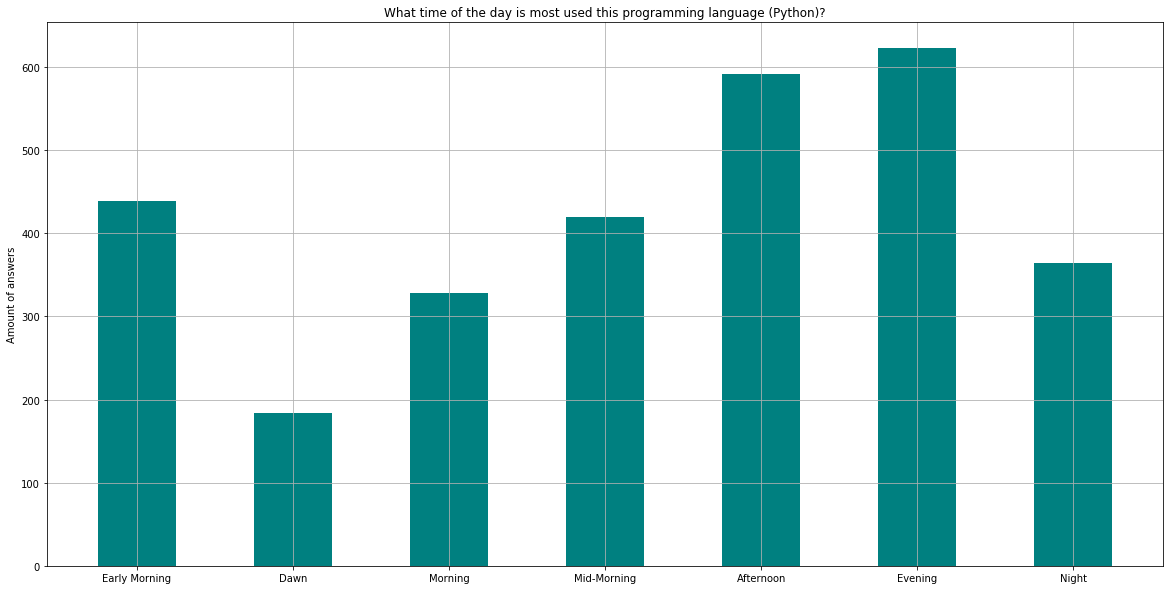

In [97]:
dates=['Early Morning','Dawn','Morning','Mid-Morning','Afternoon','Evening','Night']
plt.title('What time of the day is most used this programming language (Python)?')
plt.ylabel('Amount of answers')
plt.bar(dates,listNumbersPython_time[0],color='teal',width=.5)
plt.grid(True)

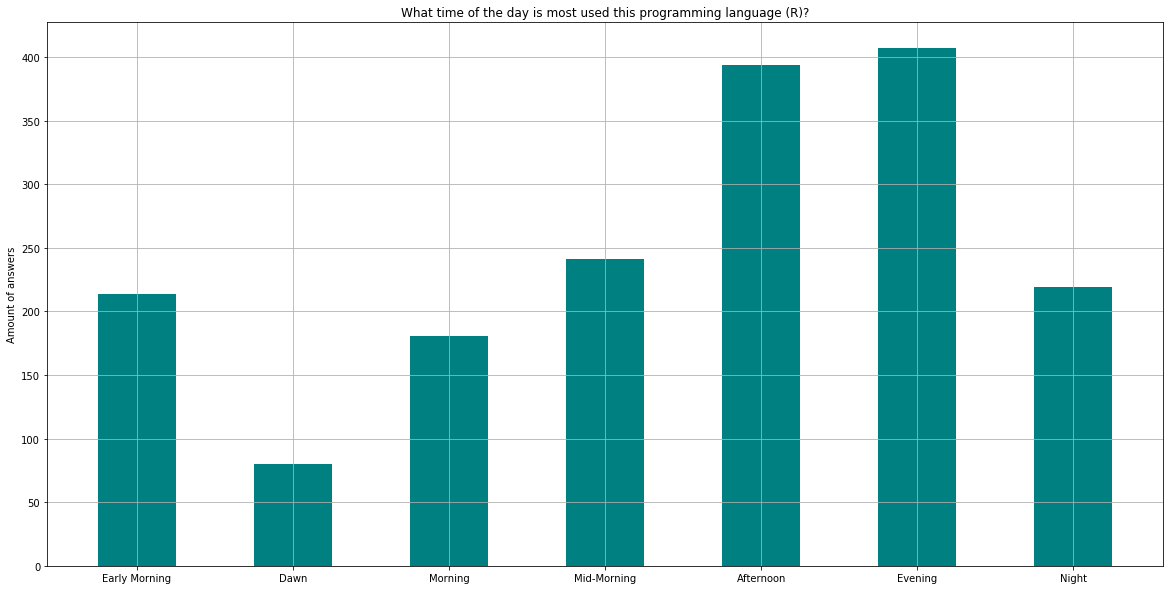

In [98]:
dates=['Early Morning','Dawn','Morning','Mid-Morning','Afternoon','Evening','Night']
plt.title('What time of the day is most used this programming language (R)?')
plt.ylabel('Amount of answers')
plt.bar(dates,listNumbersR_time[0],color='teal',width=.5)
plt.grid(True)

In [69]:
print('ACCORDING THE NUMBER OF ANSWERS MADE FOR EACH PROGRAMMING LANGUAGE')
print('           ','Early Morning |','Dawn |','Morning |','Mid-morning |','Afternoon |','Evening |','Night')
print('JavaScript:', end="  ")
for i in range(7): print (listNumbersJavaScr_time[0][i], end="      ")
print()
print('Java:      ',end="  ")
for i in range(7): print (listNumbersJava_time[0][i], end="      ")
print()
print('Python:    ',end="  ")
for i in range(7): print (listNumbersPython_time[0][i], end="      ")
print()
print('Php:       ',end="  ")
for i in range(7): print (listNumbersPhp_time[0][i], end="      ")
print()
print('R:         ',end="  ")
for i in range(7): print (listNumbersR_time[0][i], end="      ")
print()
print('Scala:     ',end="   ")
for i in range(7): print (listNumbersScala_time[0][i], end="      ")

ACCORDING THE NUMBER OF ANSWERS MADE FOR EACH PROGRAMMING LANGUAGE
            Early Morning | Dawn | Morning | Mid-morning | Afternoon | Evening | Night
JavaScript:  445.0      215.0      438.0      633.0      841.0      758.0      417.0      
Java:        394.0      216.0      464.0      545.0      680.0      655.0      344.0      
Python:      439.0      184.0      328.0      420.0      592.0      623.0      364.0      
Php:         286.0      159.0      371.0      484.0      577.0      414.0      262.0      
R:           214.0      80.0      181.0      241.0      394.0      407.0      219.0      
Scala:        123.0      61.0      141.0      170.0      265.0      267.0      124.0      

In [99]:
workbook = xlsxwriter.Workbook('timeofday.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write(0, 1,'Early Morning')
worksheet.write(0, 2,'Dawn')
worksheet.write(0, 3,'Morning')
worksheet.write(0, 4,'Mid-morning')
worksheet.write(0, 5,'Afternoon')
worksheet.write(0, 6,'Evening')
worksheet.write(0, 7,'Night')

row = 1

worksheet.write(row, 0,'JavaScript')
for i in range(7):
    worksheet.write(row, i+1,listNumbersJavaScr_time[0][i])
row+=1

worksheet.write(row, 0,'Java')
for i in range(7):
    worksheet.write(row, i+1,listNumbersJava_time[0][i])
row+=1

worksheet.write(row, 0,'Python')
for i in range(7):
    worksheet.write(row, i+1,listNumbersPython_time[0][i])
row+=1

worksheet.write(row, 0,'Php')
for i in range(7):
    worksheet.write(row, i+1,listNumbersPhp_time[0][i])
row+=1

worksheet.write(row, 0,'R')
for i in range(7):
    worksheet.write(row, i+1,listNumbersR_time[0][i])
row+=1

worksheet.write(row, 0,'Scala')
for i in range(7):
    worksheet.write(row, i+1,listNumbersScala_time[0][i])
row+=1

workbook.close()

As we can see, there are similar trends in our information for each language. For example, Javascript users prefers to work in Mid-morning and Afternoon and Python users prefers to work in Afternoon and Evening. Hence, after reviewing all the data for each language, it is consistent to say that people prefers to work in afternoons and evenings when comes to work with any programming language.

This is reflected in my own experience. My time peaks when I work really hard and more detailed are in the afternoon and evening. And you? This information also reflects your work experience using any of these programming languages?